## Reinforce Learning with Human Feedback (RLHF) for algorithemic trading

In [ ]:
#!pip install ta

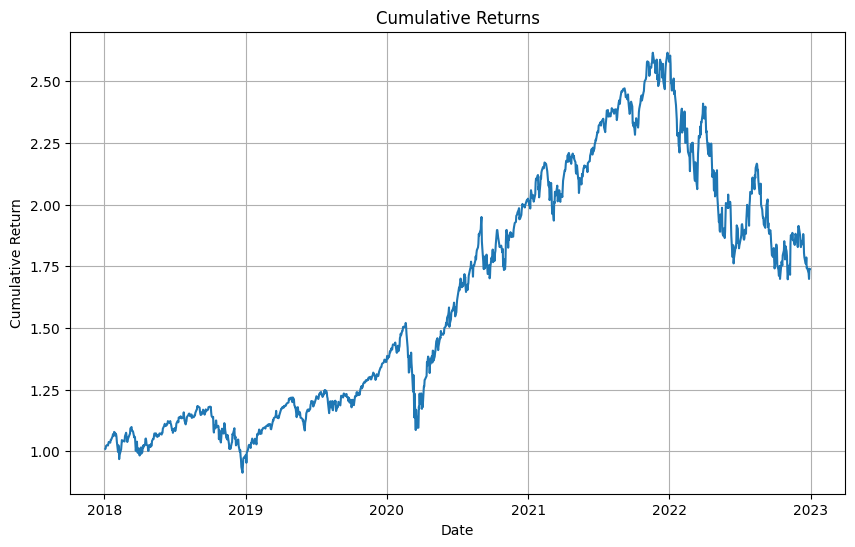

Sharpe Ratio: 0.45
CAGR: 11.71%
Cumulative Returns: 173.90%
Variance: 0.068559
CVaR: nan


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Retrieve historical stock price data for QQQ from 2018 to 2022
qqq = yf.Ticker("QQQ")
data = qqq.history(start="2018-01-01", end="2022-12-31")

# Define the trading strategy
def trading_strategy(data):
    # Define your trading strategy based on the historical data
    # Example: Buy when the price is above the 50-day moving average, sell otherwise
    signals = pd.DataFrame(index=data.index)
    signals['Signal'] = np.where(data['Close'] > data['Close'].rolling(window=50).mean(), 1, 0)
    return signals

# Perform backtesting
def backtest(data, signals):
    # Combine the historical data with the trading signals
    df = pd.concat([data, signals], axis=1).dropna()

    # Calculate daily returns
    df['Return'] = df['Close'].pct_change()

    # Calculate cumulative returns
    df['Cumulative Return'] = (1 + df['Return']).cumprod()

    # Calculate portfolio value
    df['Portfolio Value'] = df['Cumulative Return'] * initial_investment

    # Calculate risk-free rate (assumed to be 0 in this example)
    risk_free_rate = 0

    # Calculate metrics
    num_trading_days = len(df)
    returns = df['Return']
    cumulative_returns = df['Cumulative Return']
    portfolio_value = df['Portfolio Value']
    annual_returns = (cumulative_returns[-1]) ** (252/num_trading_days) - 1
    volatility = returns.std() * np.sqrt(252)  # Annualized volatility
    sharpe_ratio = (annual_returns - risk_free_rate) / volatility
    cagr = (cumulative_returns[-1]) ** (252/num_trading_days) - 1
    # alpha, beta = np.polyfit(returns - risk_free_rate, market_returns - risk_free_rate, deg=1)
    variance = returns.var() * 252
    cvar = returns[returns <= np.percentile(returns, 5)].mean() * 252

    return df, sharpe_ratio, cagr, cumulative_returns,  variance, cvar

# Define initial investment amount
initial_investment = 10000

# Perform the trading strategy
signals = trading_strategy(data)

# Perform backtesting and calculate metrics
backtest_results, sharpe_ratio, cagr, cumulative_returns,  variance, cvar = backtest(data, signals)

# Plot the cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(backtest_results.index, cumulative_returns)
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.show()

# Print the calculated metrics
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"CAGR: {cagr:.2%}")
print(f"Cumulative Returns: {cumulative_returns[-1]:.2%}")
#print(f"Alpha: {alpha:.4f}")
#print(f"Beta: {beta:.4f}")
print(f"Variance: {variance:.6f}")
print(f"CVaR: {cvar:.6f}")


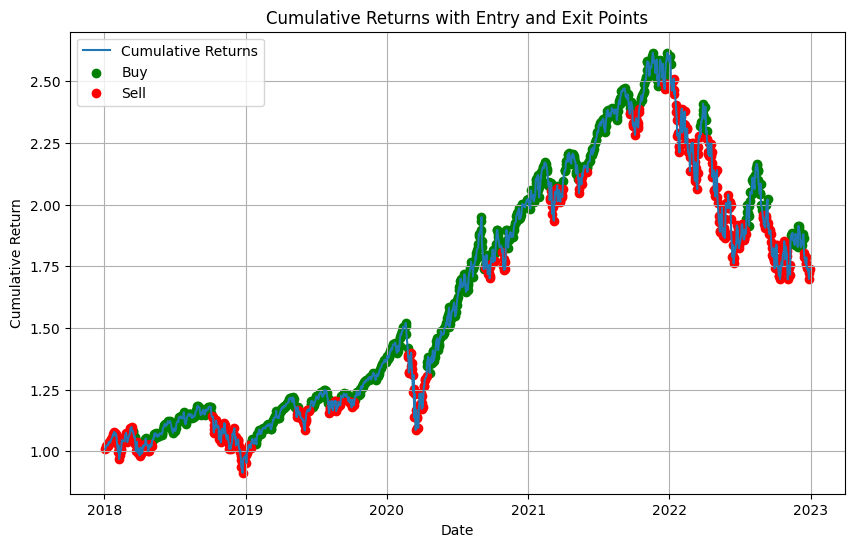

Sharpe Ratio: 2.82
CAGR: 11.71%
Cumulative Returns: 173.90%
Variance: 0.068559
CVaR: nan


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Retrieve historical stock price data for QQQ from 2018 to 2022
qqq = yf.Ticker("QQQ")
data = qqq.history(start="2018-01-01", end="2022-12-31")

# Define the trading strategy
def trading_strategy(data):
    # Define your trading strategy based on the historical data
    # Example: Buy when the price is above the 50-day moving average, sell otherwise
    signals = pd.DataFrame(index=data.index)
    signals['Signal'] = np.where(data['Close'] > data['Close'].rolling(window=50).mean(), 1, 0)
    return signals

# Perform backtesting and calculate metrics
def backtest(data, signals):
    # Combine the historical data with the trading signals
    df = pd.concat([data, signals], axis=1).dropna()

    # Calculate daily returns
    df['Return'] = df['Close'].pct_change()

    # Calculate cumulative returns
    df['Cumulative Return'] = (1 + df['Return']).cumprod()

    # Calculate portfolio value
    df['Portfolio Value'] = df['Cumulative Return'] * initial_investment

    # Calculate metrics
    num_trading_days = len(df)
    returns = df['Return']
    cumulative_returns = df['Cumulative Return']
    variance = returns.var() * 252
    cvar = returns[returns <= np.percentile(returns, 5)].mean() * 252

    return df, cumulative_returns, variance, cvar

# Define initial investment amount
initial_investment = 10000

# Perform the trading strategy
signals = trading_strategy(data)

# Perform backtesting and calculate metrics
backtest_results, cumulative_returns, variance, cvar = backtest(data, signals)

# Plot the cumulative returns with entry and exit points
plt.figure(figsize=(10, 6))
plt.plot(backtest_results.index, cumulative_returns, label='Cumulative Returns')
plt.scatter(backtest_results[backtest_results['Signal'] == 1].index, backtest_results[backtest_results['Signal'] == 1]['Cumulative Return'], color='green', label='Buy')
plt.scatter(backtest_results[backtest_results['Signal'] == 0].index, backtest_results[backtest_results['Signal'] == 0]['Cumulative Return'], color='red', label='Sell')
plt.title('Cumulative Returns with Entry and Exit Points')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

# Print the calculated metrics
sharpe_ratio = (cumulative_returns[-1] - 1) / np.sqrt(variance)
cagr = (cumulative_returns[-1]) ** (252/len(data)) - 1

print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"CAGR: {cagr:.2%}")
print(f"Cumulative Returns: {cumulative_returns[-1]:.2%}")
print(f"Variance: {variance:.6f}")
print(f"CVaR: {cvar:.6f}")

### Code example 1

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import random

init_portfolio = 10000

# Retrieve historical stock price data for QQQ
qqq = yf.Ticker("QQQ")
data = qqq.history(start="2018-01-01", end="2022-12-31")

n = random.randint(0,len(data))
randomlist = []
for i in range(0,len(data)):
    n = random.randint(0,1)
    randomlist.append(n)

all_ones = [1] * len(data)

# Define the human feedback (example)
human_feedback = pd.DataFrame(index=data.index)
human_feedback['Feedback'] = randomlist  # 1 indicates positive feedback, 0 indicates negative feedback


# Define the trading strategy
def trading_strategy(data):
    # Define your trading strategy based on the historical data
    # Example: Buy when the price is above the 50-day moving average, sell otherwise
    signals = pd.DataFrame(index=data.index)
    signals['Signal'] = np.where(data['Close'] > data['Close'].rolling(window=50).mean(), 1, 0)
    return signals


# Apply reinforcement learning with human feedback
def reinforce_learning_with_human_feedback(data, human_feedback):
    signals = trading_strategy(data)  # Get initial signals from the trading strategy
    signals['Feedback'] = human_feedback['Feedback']  # Incorporate human feedback into signals

    # Iterate over the signals and adjust them based on human feedback
    for i in range(1, len(signals)):
        if signals['Feedback'].iloc[i] == 1 and signals['Signal'].iloc[i] == 0:
            signals['Signal'].iloc[i] = 1  # Adjust the signal to buy based on positive feedback
        elif signals['Feedback'].iloc[i] == 0 and signals['Signal'].iloc[i] == 1:
            signals['Signal'].iloc[i] = 0  # Adjust the signal to sell based on negative feedback

    return signals

# Perform trading with reinforcement learning and human feedback
trading_signals = reinforce_learning_with_human_feedback(data, human_feedback)


# Place trades based on recommended entry and exit points
def place_trades(data, signals):
    portfolio = init_portfolio  # Initialize portfolio

    # Iterate over the signals and place trades accordingly
    for i in range(1, len(signals)):
        if signals['Signal'].iloc[i] == 1 and signals['Signal'].iloc[i-1] == 0:
            # Buy QQQ
            price = data['Close'].iloc[i]
            shares = portfolio / price  # Invest entire portfolio in QQQ
            portfolio = 0  # Reset portfolio to 0

        elif signals['Signal'].iloc[i] == 0 and signals['Signal'].iloc[i-1] == 1:
            # Sell QQQ
            price = data['Close'].iloc[i]
            portfolio = shares * price  # Update portfolio value

    return portfolio

final_portfolio = place_trades(data, trading_signals)

# Print the final portfolio value
print(f"Final Portfolio Value: ${final_portfolio:.2f}")


Final Portfolio Value: $10477.77


### Code example 2

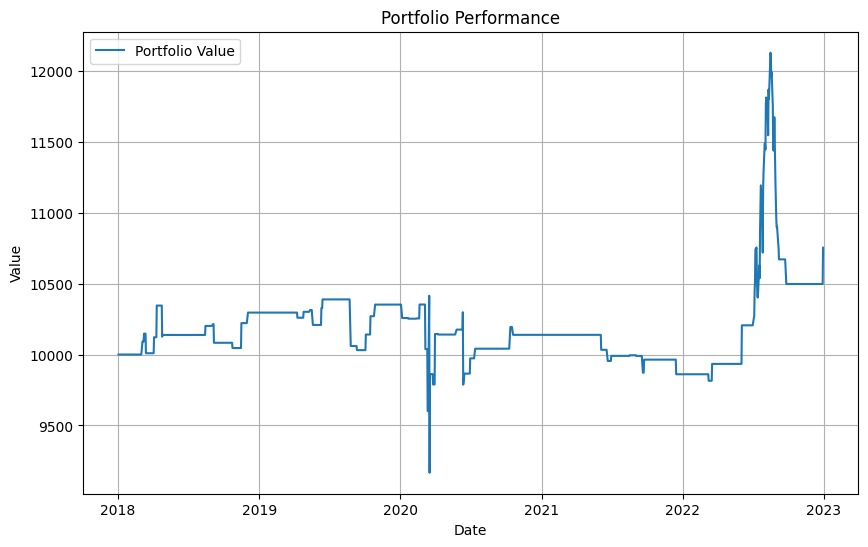

Metrics:
Sharpe Ratio: 0.194
CAGR: 0.015
Cumulative Returns: 0.075
Variance: 0.000042
CVaR (Conditional Value at Risk): -0.011010
Alpha: -0.052566
Beta: 0.000109
portfolio_value: 10753.106779


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf

# Retrieve historical stock price data for QQQ
qqq = yf.Ticker("QQQ")
data = qqq.history(start="2018-01-01", end="2022-12-31")

# Define the Q-learning agent
class QLearningAgent:
    def __init__(self, num_states, num_actions, alpha, gamma):
        self.num_states = num_states
        self.num_actions = num_actions
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.q_table = np.zeros((num_states, num_actions))

    def update_q_table(self, state, action, reward, next_state):
        # Q-learning update rule
        max_q_value = np.max(self.q_table[next_state])
        self.q_table[state, action] += self.alpha * (reward + self.gamma * max_q_value - self.q_table[state, action])

    def choose_action(self, state, epsilon):
        # Epsilon-greedy policy for action selection
        if np.random.uniform() < epsilon:
            return np.random.choice(self.num_actions)
        else:
            return np.argmax(self.q_table[state])

# Define the trading strategy with Q-learning and human feedback
def trading_strategy(data, q_agent, entry_points, exit_points, initial_investment):
    num_states = 2  # Number of states (0: out of the market, 1: in the market)
    num_actions = 2  # Number of actions (0: no trade, 1: trade)

    epsilon = 0.1  # Exploration rate
    total_reward = 0  # Track total reward
    portfolio_value = [initial_investment]  # Track portfolio value
    trades = []  # Track executed trades

    # Iterate over each trading day
    for i in range(len(data) - 1):
        state = 0 if portfolio_value[-1] == 0 else 1  # Current state

        # Check if an entry point exists for the current day
        if data.index[i] in entry_points:
            # Get the recommended action for the current day from human feedback
            action = entry_points[data.index[i]]

            # Execute the recommended action
            if action == 'BUY' and state == 0:
                state = 1  # Enter the market
                shares = portfolio_value[-1] / data['Close'][i]  # Buy as many shares as possible
                trades.append(('BUY', data.index[i], data['Close'][i], shares))
            elif action == 'SELL' and state == 1:
                state = 0  # Exit the market
                shares = portfolio_value[-1] / data['Close'][i]  # Sell all shares
                trades.append(('SELL', data.index[i], data['Close'][i], shares))

        # Calculate the reward based on the portfolio value change
        reward = (portfolio_value[-1] - portfolio_value[-2]) / portfolio_value[-2] if i > 0 else 0
        total_reward += reward

        # Choose the action using epsilon-greedy policy
        action = q_agent.choose_action(state, epsilon)

        # Execute the action
        if action == 1 and state == 0:
            state = 1  # Enter the market
            shares = portfolio_value[-1] / data['Close'][i]  # Buy as many shares as possible
            trades.append(('BUY', data.index[i], data['Close'][i], shares))
        elif action == 0 and state == 1:
            state = 0  # Exit the market
            shares = portfolio_value[-1] / data['Close'][i]  # Sell all shares
            trades.append(('SELL', data.index[i], data['Close'][i], shares))

        # Update the Q-table
        next_state = 0 if state == 0 else 1  # Next state
        q_agent.update_q_table(state, action, reward, next_state)

        # Update the portfolio value
        portfolio_value.append(shares * data['Close'][i])

    return total_reward, portfolio_value, trades

# Define the entry and exit points based on human feedback (example)
entry_points = {
    '2018-04-01': 'BUY',
    '2018-05-01': 'SELL',
    '2018-08-01': 'BUY',
    '2018-09-01': 'SELL'
}

exit_points = {
    '2018-05-01': 'SELL',
    '2018-06-01': 'BUY',
    '2018-09-01': 'SELL',
    '2018-10-01': 'BUY'
}

# Set the initial investment
initial_investment = 10000

# Create the Q-learning agent
q_agent = QLearningAgent(num_states=2, num_actions=2, alpha=0.2, gamma=0.9)

# Apply the trading strategy
total_reward, portfolio_value, trades = trading_strategy(data, q_agent, entry_points, exit_points, initial_investment)

# Calculate metrics
returns = np.diff(portfolio_value) / portfolio_value[:-1]
sharpe_ratio = np.sqrt(252) * np.mean(returns) / np.std(returns)
cagr = (portfolio_value[-1] / portfolio_value[0]) ** (252 / len(data)) - 1
cumulative_returns = (portfolio_value[-1] - portfolio_value[0]) / portfolio_value[0]
variance = np.var(returns)
cvar = np.mean(returns[returns < np.percentile(returns, 5)])
alpha, beta = np.polyfit(data['Close'].pct_change().dropna(), returns, deg=1)

# Plot portfolio performance
plt.figure(figsize=(10, 6))
plt.plot(data.index, portfolio_value, label='Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Portfolio Performance')
plt.legend()
plt.grid(True)
plt.show()

# Print metrics
print('Metrics:')
print(f'Sharpe Ratio: {sharpe_ratio:.3f}')
print(f'CAGR: {cagr:.3f}')
print(f'Cumulative Returns: {cumulative_returns:.3f}')
print(f'Variance: {variance:.6f}')
print(f'CVaR (Conditional Value at Risk): {cvar:.6f}')
print(f'Alpha: {alpha:.6f}')
print(f'Beta: {beta:.6f}')
print(f'portfolio_value: {portfolio_value[-1]:.6f}')

# Print the executed trades
#print('Executed Trades:')
#for trade in trades:
#    print(trade)
